### figures for presentation

In [46]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

#from src.attractor_model import *


In [47]:
allsub_RT =  []
allsub_RTM = []

allsub_meanbold = np.zeros(215)
allsub_meanboldfull = np.zeros([5,215])

allsub_choice = np.zeros(215)
allsub_choicefull = np.zeros([5,215])

for whichsub in range(1,6):
    
    #print(whichsub)
    
    subdata = pd.read_csv(f'sub_{whichsub}_alldata.csv')
    subrtM = subdata['modeled_RT']
    subrtM = subrtM - 1 #because the model setting, onset of stimuli is 1s
    subrt = subdata['RT']
    allsub_RT  = np.append(allsub_RT,subrt)
    allsub_RTM = np.append(allsub_RTM,subrtM)
    meanbold = subdata['meanbold']
    
    allsub_meanbold += meanbold
    
    subchoice = subdata['modeled_choice']
    allsub_choice += subchoice[0:215]
    single_subchoice = subchoice[0:215]
    
    allsub_choicefull[whichsub-1] = single_subchoice
    allsub_meanboldfull[whichsub-1] = meanbold
    
    
    #####~!!!!! np.append 可以实现Matlab当中简易的矩阵叠加功能 ~!!!!!#####
    
    
    
    

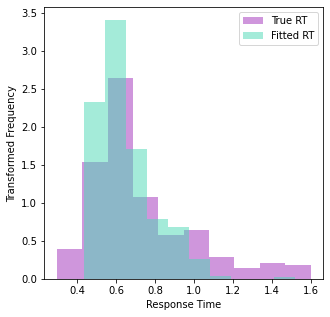

In [3]:

fig,axRT = plt.subplots(1,1, figsize=(5,5))


# fig,axBOLD = plt.subplots(figsize=(4,4))
#


axRT.hist(allsub_RT, density=True, facecolor="#a02eba", alpha=0.5)
axRT.set_xlabel('Response Time')
axRT.set_ylabel('Frequency')


axRT.hist(allsub_RTM, density=True, facecolor="#4ad8b5", alpha=0.5)
axRT.set_xlabel('Response Time')
#axRT.xticks(fontsize=10)

axRT.set_ylabel('Transformed Frequency')

axRT.legend(['True RT','Fitted RT'])

plt.savefig('results_RT.png', dpi=600)#指定分辨率

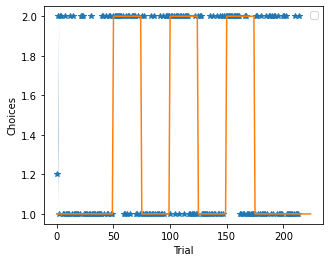

In [4]:
stable50 = np.ones(50)
reve25 = np.ones(25)
y_exp = np.concatenate([stable50,2*reve25,reve25,2*reve25,reve25,2*reve25,stable50])

y = allsub_choice/5

standard_dev = np.zeros(215)
for trial in range(0,len(allsub_choice)):
    
    standard_dev[trial] = np.std(allsub_choicefull[:,trial])/np.sqrt(5)



fig,axRT = plt.subplots(1,1, figsize=(5,4))

axRT.set_xlabel('Trial')
axRT.set_ylabel('Choices')
axRT.set_xlabel('Trial')

axRT.legend(['True RT','Fitted RT'])

axRT.plot(y,'*')
axRT.plot(y_exp)
axRT.fill_between(y, y-standard_dev, y+standard_dev)
#axRT.show()

plt.savefig('results_choices.png', dpi=600)#指定分辨率

############################bold part

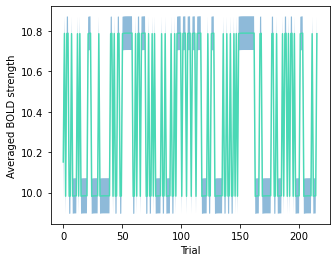

In [15]:
stable50 = np.ones(50)
reve25 = np.ones(25)
#y_exp = np.concatenate([stable50,2*reve25,reve25,2*reve25,reve25,2*reve25,stable50])

y = allsub_meanbold/5

standard_dev = np.zeros(215)


for trial in range(0,len(allsub_meanbold)):
    
    standard_dev[trial] = np.std(allsub_meanboldfull[:,trial])/np.sqrt(5)



    
meanbold_stage = [np.mean(allsub_meanboldfull[:,1:50]),np.mean(allsub_meanboldfull[:,51:75]),]
fig,axRT = plt.subplots(1,1, figsize=(5,4))
x = np.linspace(0, 215, 215)
axRT.set_xlabel('Trial')
axRT.set_ylabel('Averaged BOLD strength')
axRT.set_xlabel('Trial')

#axRT.legend(['True RT','Fitted RT'])

axRT.plot(x,y,"#4ad8b5")

axRT.fill_between(x, y-standard_dev, y+standard_dev,alpha = 0.5)
#axRT.show()

plt.savefig('results_meanbold.png', dpi=600)#

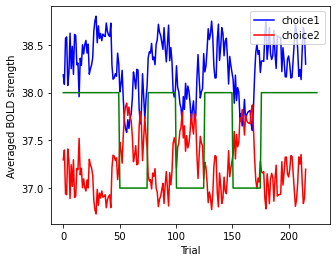

In [60]:

allsub_meanbold1_full = np.zeros([5,215])
allsub_meanbold2_full = np.zeros([5,215])


for whichsub in range(1,6):
    
    #print(whichsub)
    
    subdata = pd.read_csv(f'sub_{whichsub}_alldata_add_two_meanbold_0806.csv')

    ####
    meanbold1 = subdata['bold1']
    meanbold2 = subdata['bold2']
        
    allsub_meanbold1_full[whichsub-1] = meanbold1[0:215]
    allsub_meanbold2_full[whichsub-1] = meanbold2[0:215]


standard_dev = np.zeros(215)


for trial in range(0,len(allsub_meanbold)):
    
    standard_dev[trial] = np.std(allsub_meanboldfull[:,trial])/np.sqrt(5)



    
#meanbold_stage = [np.mean(allsub_meanboldfull[:,1:50]),np.mean(allsub_meanboldfull[:,51:75]),]
fig,axRT = plt.subplots(1,1, figsize=(5,4))
x = np.linspace(0, 215, 215)
axRT.set_xlabel('Trial')
axRT.set_ylabel('Averaged BOLD strength')
axRT.set_xlabel('Trial')



axRT.plot(x,np.mean(allsub_meanbold1_full,0),"blue")
axRT.plot(x,np.mean(allsub_meanbold2_full,0),'red')

axRT.legend(['choice1','choice2'],loc="upper right")

#axRT.fill_between(x, y-standard_dev, y+standard_dev,alpha = 0.5)
#axRT.show()
#axRT.ylim([10.0,11.0])

#设置坐标轴刻度
#my_x_ticks = np.arange(-5, 5, 0.5)
#my_y_ticks = np.arange(9, 11, 0.8)
#plt.xticks(my_x_ticks)
#plt.yticks(my_y_ticks)



y_exp = np.concatenate([stable50,2*reve25,reve25,2*reve25,reve25,2*reve25,stable50])
y_expplus = 2-y_exp+37

axRT.plot(np.linspace(0,225,225),y_expplus,'green')


plt.savefig('results_meanbold.png', dpi=600)#